q. https://leetcode.com/problems/minimum-cost-to-cut-a-stick/description/  
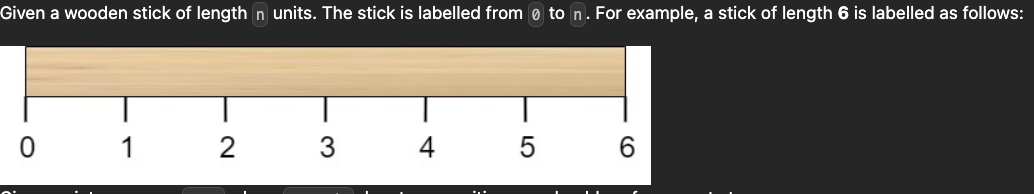

6 pieces and indices from 0 to 6

Given an integer array cuts where cuts[i] denotes a position you should perform a cut at.

You should perform the cuts in order, you can change the order of the cuts as you wish.

The cost of one cut is the length of the stick to be cut  
Return the minimum total cost of the cuts.

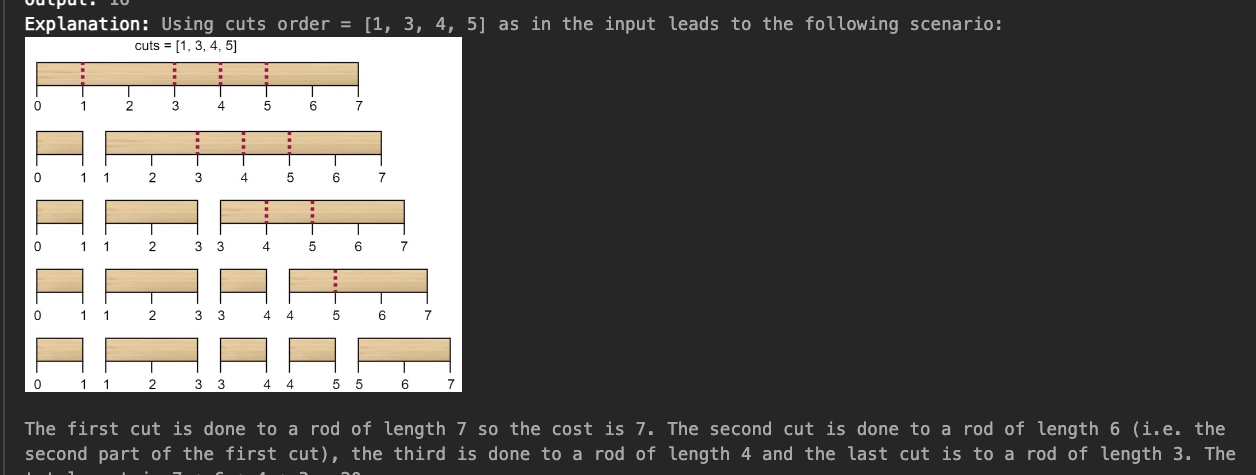

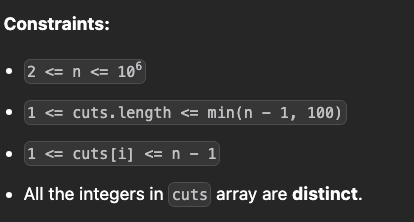

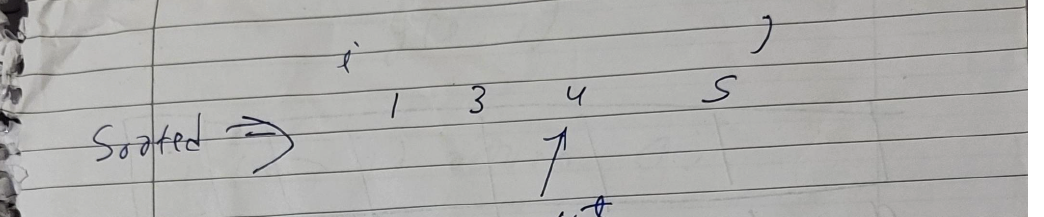

My intuitive method which I derived on my own and the same was used by leetcode editorial

In [ ]:
class Solution {
    public:
    
        int f(int s, int e, vector<int> &v, vector<vector<int>> &mem){
            if(s>=e) return 0;
            if(e-s==1) return 0;
            if(mem[s][e]!=-1) return mem[s][e];
            int minn=INT_MAX;
            for(int splitPoint=s+1;splitPoint<e;splitPoint++){
                int cost=v[e]-v[s]+ f(s,splitPoint,v,mem)+ f(splitPoint,e,v,mem);
                minn= min(minn,cost); 
            }
            return mem[s][e]=minn;
        }
    
        int minCost(int origLen, vector<int>& v) {
            int n=v.size();
            sort(v.begin(),v.end());
            v.insert(v.begin(),0);
            v.push_back(origLen);
            //len become n+2 
            vector<vector<int>> mem(n+2,vector<int>(n+2,-1));   
            return f(0,n+1,v,mem);
        }
    };

Archieved 

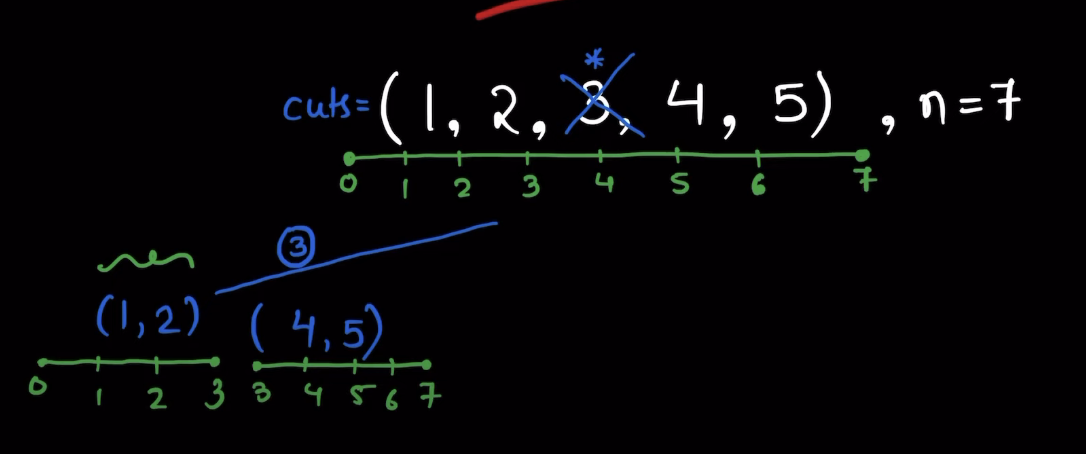

when not sorted  
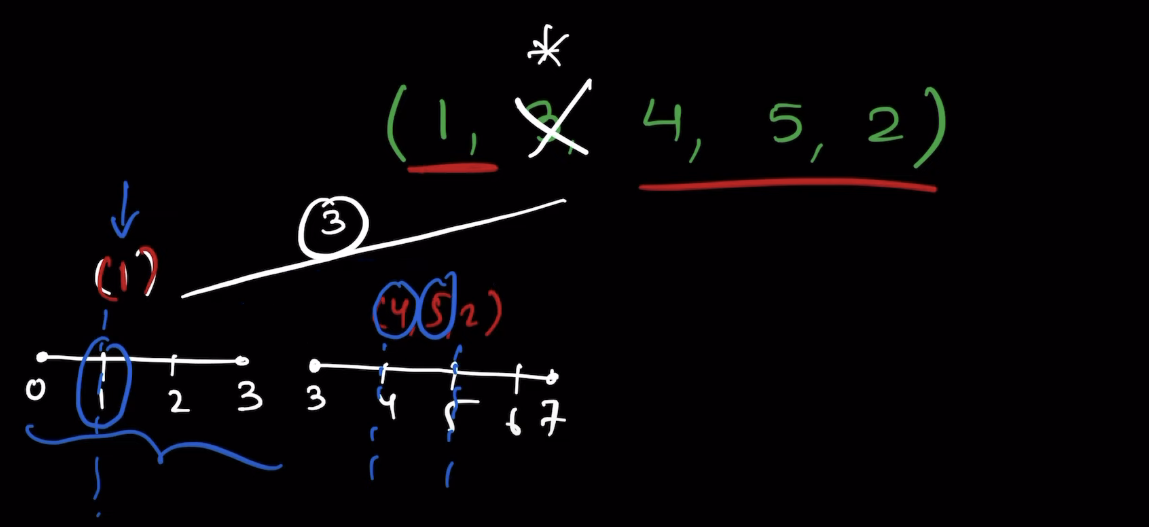

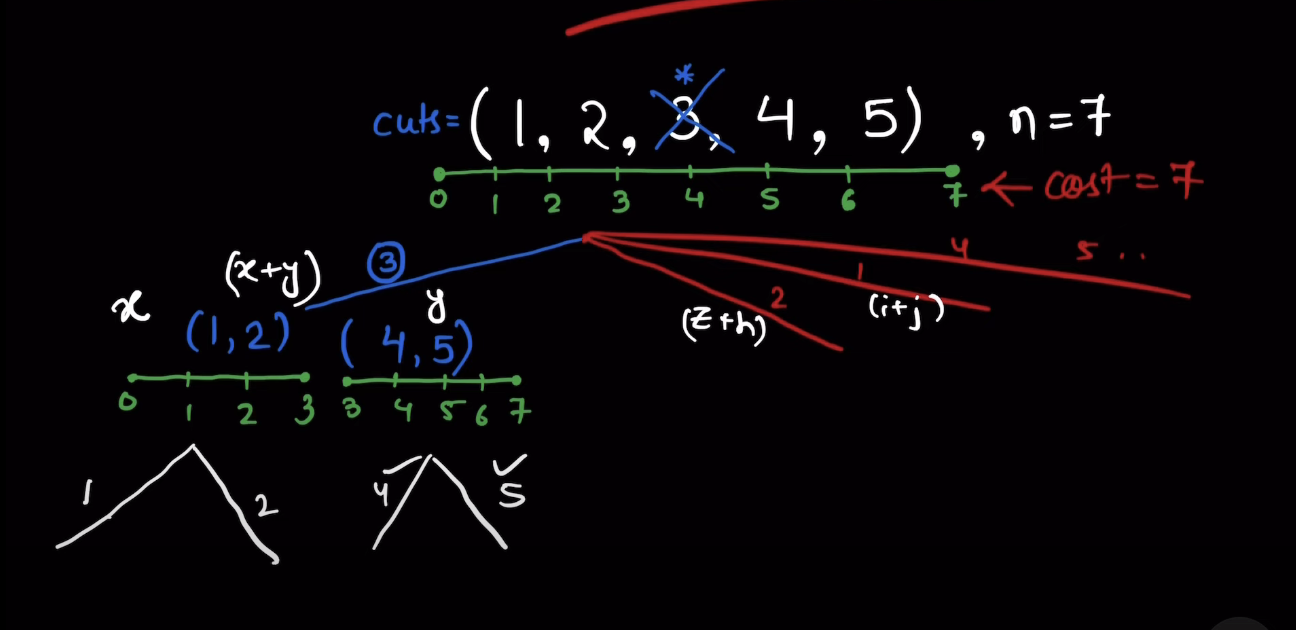

adding elements so that it helps us in finding the length  
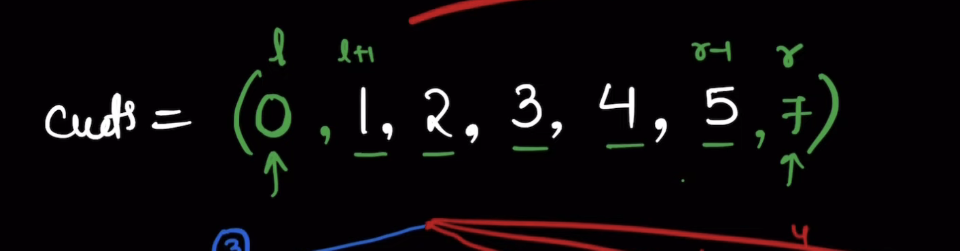

this indices were already present but not the elements

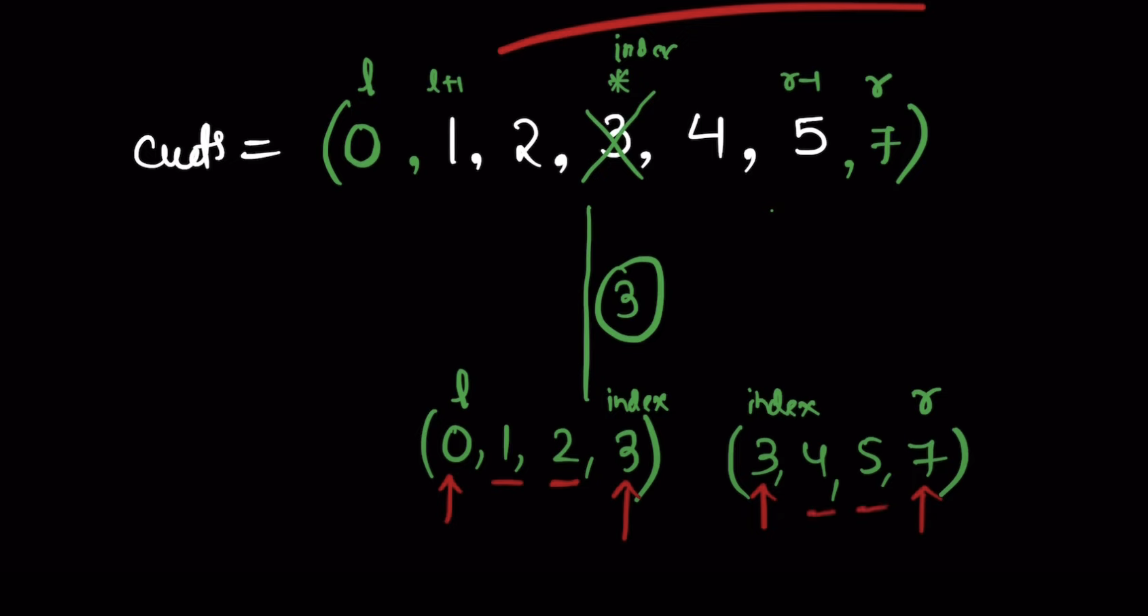  
Only cuts in the middle, for calculation only the extreme elements are present

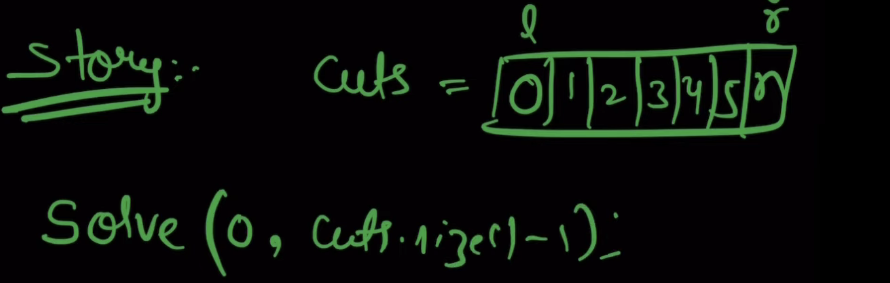

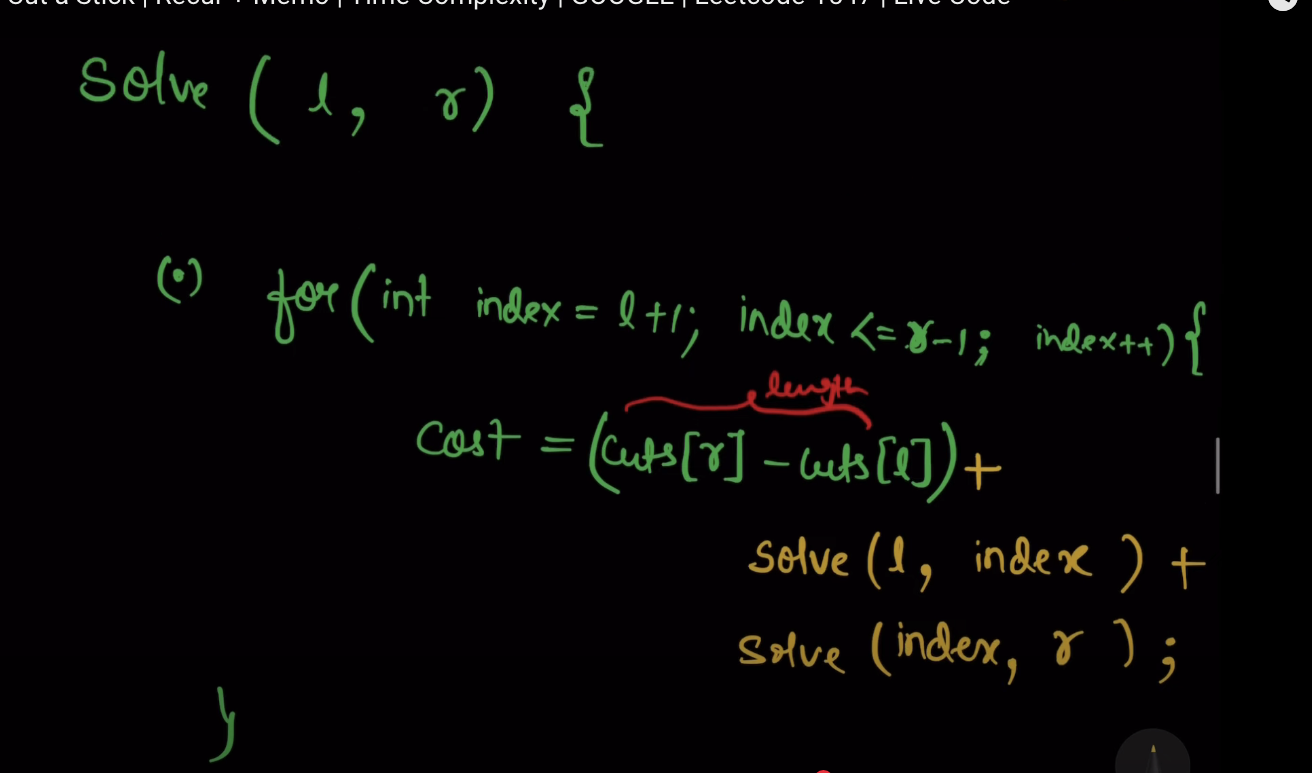

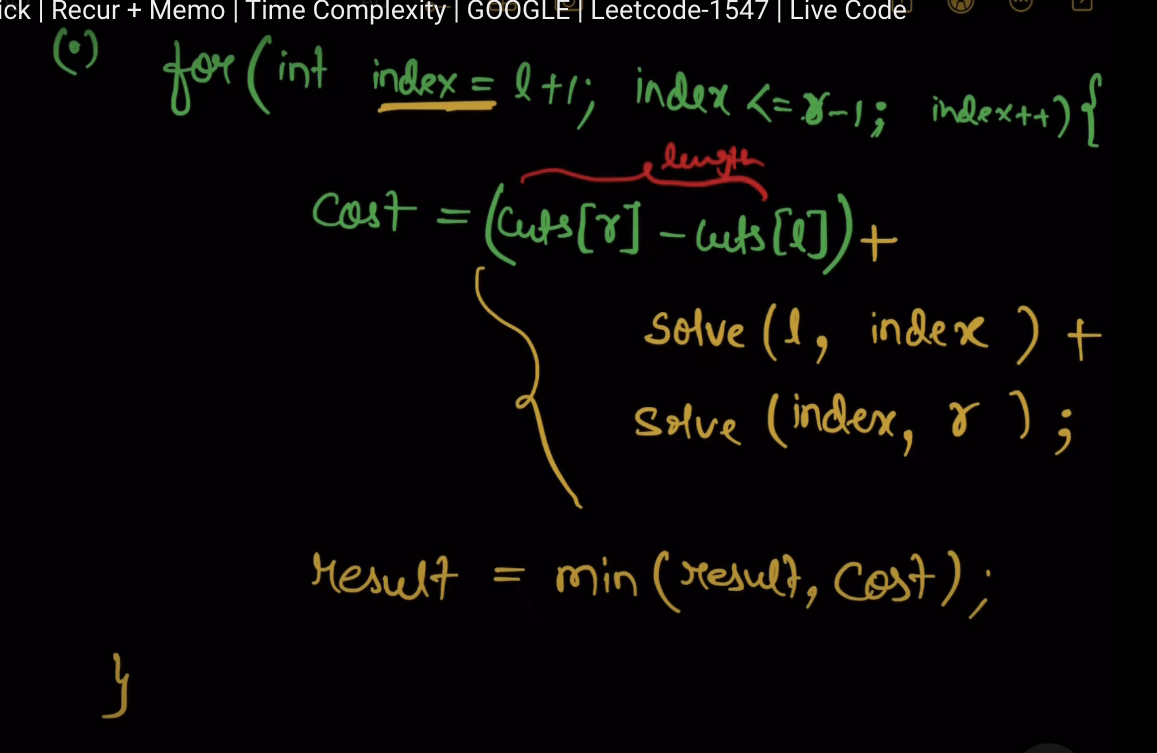

In [ ]:
class Solution {
public:

    int f(int sIdx, int eIdx, vector<int> &cutPosArr){
        if(sIdx>eIdx) return 0;
        int minn=INT_MAX;
        for(int cutIdx=sIdx;cutIdx<=eIdx;cutIdx++){
            int cost=cutPosArr[eIdx+1]-cutPosArr[sIdx-1]+ f(sIdx,cutIdx-1,cutPosArr)+ f(cutIdx+1,eIdx,cutPosArr);
            minn= min(minn,cost); 
        }
        return minn;
    }

    int minCost(int len, vector<int>& cutPosArr) {
        int n=cutPosArr.size();
        sort(cutPosArr.begin(),cutPosArr.end());
        cutPosArr.insert(cutPosArr.begin(),0);
        cutPosArr.push_back(len);
        //len become n+2
        //but we have to solve for actual cut positions 1 and n
        return f(1,n,cutPosArr);
    }
};



In [ ]:
class Solution {
    public:
    
        int f(int i, int j, vector<int> &v, vector<vector<int>> &mem){
            if(i>j) return 0;
            if(mem[i][j]!=-1) return mem[i][j];
            int minn=INT_MAX;
            for(int k=i;k<=j;k++){
                int cost=v[j+1]-v[i-1]+ f(i,k-1,v,mem)+ f(k+1,j,v,mem);
                minn= min(minn,cost); 
            }
            return mem[i][j]=minn;
        }
    
        int minCost(int len, vector<int>& v) {
            int n=v.size();
            sort(v.begin(),v.end());
            v.insert(v.begin(),0);
            v.push_back(len);
            //len become n+2 
            vector<vector<int>> mem(n+1,vector<int>(n+1,-1));   
            return f(1,n,v,mem);
        }
    };

bottom up along with other mcm problems

burst balloon  
https://leetcode.com/problems/burst-balloons/description/  


In [ ]:
class Solution {
    public:
        int f(vector<int>& v, vector<vector<int>> &mem, int l, int r){
            if(l>r) return 0;
            if(mem[l][r]!=-1) return mem[l][r];
            int result=0;
            for(int i=l;i<=r;i++){
                int curr=v[l-1] * v[i] * v[r+1];
                int remain=f(v,mem,l,i-1)+f(v,mem,i+1,r);
                result=max(result, curr+ remain);
            }
            return mem[l][r]=result;
        }
    
    
        int maxCoins(vector<int>& v) {
            int n=v.size();
            v.insert(v.begin(),1);
            v.push_back(1);
            vector<vector<int>> mem(n+1, vector<int>(n+1, -1));
            return f(v,mem,1,n);
        }
    };

no. of ways a sequence can be evaluated to true  
https://leetcode.com/problems/parsing-a-boolean-expression/description/

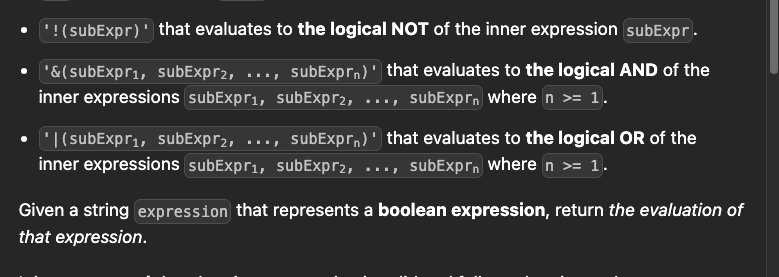

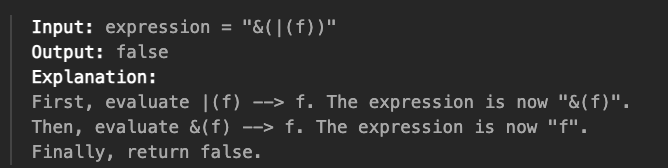

solution with stack possible